In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df=pd.read_csv("CC GENERAL.csv",index_col=0)

In [33]:
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
df.tail(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [35]:
df.shape

(8950, 17)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [37]:
np.sum(df.isnull())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
from sklearn import preprocessing
#Create scaler
minmax_norm = preprocessing.MinMaxScaler(feature_range=(0,1))
#Create feature
df_norm = minmax_norm.fit_transform(df)
#Show feature
df_norm

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [40]:
#Create scaler
scaler = preprocessing.StandardScaler()
#Transform the feature
df_scaled = scaler.fit_transform(df)
#Show feature
df_scaled

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

In [41]:
from sklearn.cluster import KMeans

In [42]:
Sum_of_squared_distances = []
range_n_clusters=[1,2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    model=KMeans(n_clusters=n_clusters, init='random',n_init=10, random_state=0)
    model.fit(df)
    Sum_of_squared_distances.append(model.inertia_)

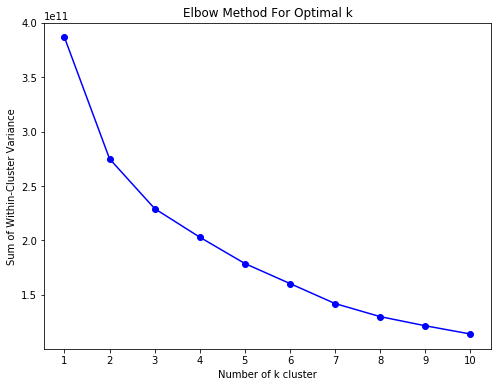

In [43]:
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters,Sum_of_squared_distances,'-o',color="blue")
plt.xlabel('Number of k cluster')
plt.ylabel('Sum of Within-Cluster Variance')
plt.title('Elbow Method For Optimal k')
plt.xticks(range_n_clusters)
plt.show()

In [44]:
from sklearn.metrics import silhouette_samples,silhouette_score
sil=[]
range_n_clusters=[2,3,4,5,6,7,8,9,10]
print("Number of clusters : \n", range_n_clusters)
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, init='random',n_init=10, random_state=0)
    preds=clusterer.fit_predict(df)
    centers=clusterer.cluster_centers_
    score=silhouette_score(df,preds,metric="euclidean")
    sil.append(score)
    print("clusters=",n_clusters,"score",score)

Number of clusters : 
 [2, 3, 4, 5, 6, 7, 8, 9, 10]
clusters= 2 score 0.511307699456009
clusters= 3 score 0.46125948602687844
clusters= 4 score 0.461668827997028
clusters= 5 score 0.37663101710890395
clusters= 6 score 0.39027779713459776
clusters= 7 score 0.3692089751890247
clusters= 8 score 0.38516420877580954
clusters= 9 score 0.3528013228486157
clusters= 10 score 0.35951073856134425


In [22]:
km1=KMeans(n_clusters=2,init='random',n_init=10, random_state=0)
km1.fit(df)
y_km1=km1.predict(df)
y_km1=pd.DataFrame(y_km1,columns=["cluster"])

In [23]:
centroid=km1.cluster_centers_
centroid

array([[3.90479615e+03, 9.45320269e-01, 2.42324901e+03, 1.58714753e+03,
        8.36502106e+02, 2.63848702e+03, 5.63396973e-01, 3.49249946e-01,
        4.11887757e-01, 2.30618646e-01, 6.71118350e+00, 2.86427796e+01,
        9.88930757e+03, 4.39770599e+03, 1.80258348e+03, 1.51684407e-01,
        1.17453855e+01],
       [9.76677019e+02, 8.81401720e-01, 6.46456029e+02, 3.38593328e+02,
        3.08149525e+02, 5.48367196e+02, 4.77727227e-01, 1.67045847e-01,
        3.57143841e-01, 1.12385982e-01, 2.39284663e+00, 1.13433912e+01,
        3.06692281e+03, 1.07597563e+03, 6.09917384e+02, 1.61369359e-01,
        1.14771858e+01]])

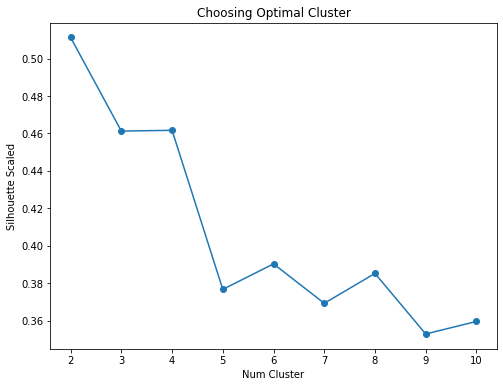

In [24]:
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, sil,'-o')
plt.title("Choosing Optimal Cluster")
plt.xlabel("Num Cluster")
plt.ylabel("Silhouette Scaled")
plt.xticks(range_n_clusters)
plt.show()

In [25]:
centroidpd=pd.DataFrame(centroid)
centroidpd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3904.796149,0.945320,2423.249012,1587.147530,836.502106,2638.487016,0.563397,0.349250,0.411888,0.230619,6.711183,28.642780,9889.307571,4397.705989,1802.583485,0.151684,11.745385
1,976.677019,0.881402,646.456029,338.593328,308.149525,548.367196,0.477727,0.167046,0.357144,0.112386,2.392847,11.343391,3066.922812,1075.975630,609.917384,0.161369,11.477186
